In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [34]:
# Loading dataset
data = pd.read_csv('data/winequality-red.csv', delimiter=';')

# Handling missing values
imputer = SimpleImputer(strategy='median')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data

In [29]:
def clustering_pipeline(X, n_clusters, technique='kmeans', preprocessing=None):
    # Preprocessing
    if preprocessing == 'normalize':
        X = StandardScaler().fit_transform(X)
    elif preprocessing == 'transform':
        X = MinMaxScaler().fit_transform(X)
    elif preprocessing == 'pca':
        X = PCA(n_components=2).fit_transform(X)
    elif preprocessing == 't+n':
        X = StandardScaler().fit_transform(X)
        X = PCA(n_components=2).fit_transform(X)
    
    # Applying clustering
    if technique == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif technique == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    elif technique == 'meanshift':
        model = MeanShift()
    
    labels = model.fit_predict(X)

    # Evaluating clustering performance
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else 'NA'
    calinski = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else 'NA'
    davies = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else 'NA'
    
    return silhouette, calinski, davies

In [30]:
# Parameters for experiments
cluster_counts = [3, 4, 5]
preprocessing_methods = [None, 'normalize', 'transform', 'pca', 't+n']
techniques = ['kmeans', 'hierarchical', 'meanshift']
results = []

# Looping through each combination
for technique in techniques:
    for n_clusters in cluster_counts:
        for method in preprocessing_methods:
            silhouette, calinski, davies = clustering_pipeline(X, n_clusters, technique, method)
            results.append({
                'Technique': technique,
                'Preprocessing': method,
                'Clusters': n_clusters,
                'Silhouette': silhouette,
                'Calinski-Harabasz': calinski,
                'Davies-Bouldin': davies
            })

In [31]:
results_df = pd.DataFrame(results)

# Print results in table format
print(results_df)

       Technique Preprocessing  Clusters  Silhouette  Calinski-Harabasz  \
0         kmeans          None         3    0.520631        3057.579740   
1         kmeans     normalize         3    0.169659         290.129831   
2         kmeans     transform         3    0.188606         375.311724   
3         kmeans           pca         3    0.533142        3141.738051   
4         kmeans           t+n         3    0.349411        1058.307213   
5         kmeans          None         4    0.483759        3051.568398   
6         kmeans     normalize         4    0.151112         245.314672   
7         kmeans     transform         4    0.188289         353.380607   
8         kmeans           pca         4    0.495602        3160.508032   
9         kmeans           t+n         4    0.361123        1145.233716   
10        kmeans          None         5    0.438353        3029.150414   
11        kmeans     normalize         5    0.153581         238.703380   
12        kmeans     tran

In [32]:
techniques = results_df['Technique'].unique()

# Converting result to styled table for better visualization
styled_tables = []
for technique in techniques:
    subset_df = results_df[results_df['Technique'] == technique]
    pivoted_df = subset_df.pivot(index='Clusters', columns='Preprocessing', values=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
    
    styled_table = pivoted_df.style.set_caption(f"Performance of {technique.capitalize()} Clustering") \
                   .background_gradient(cmap="Blues", subset=['Silhouette']) \
                   .background_gradient(cmap="Blues", subset=['Calinski-Harabasz']) \
                   .background_gradient(cmap="Blues", subset=['Davies-Bouldin'])
    
    styled_tables.append(styled_table)

for table in styled_tables:
    display(table)


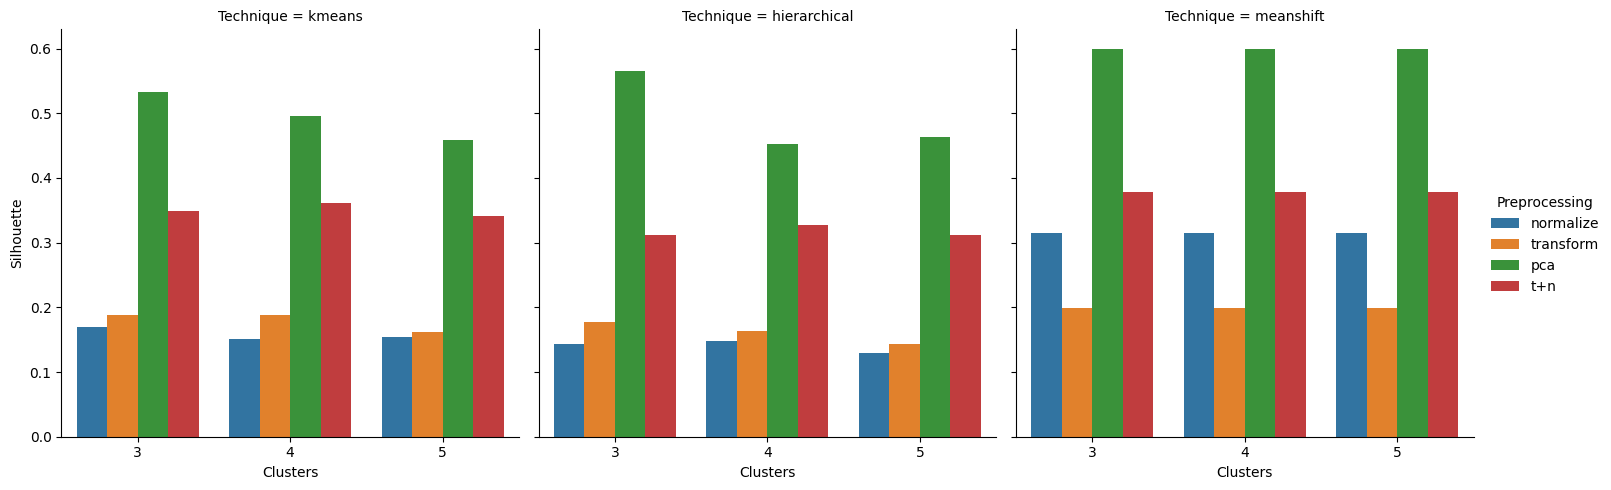

In [33]:
sns.catplot(data=results_df, x='Clusters', y='Silhouette', hue='Preprocessing', col='Technique', kind='bar')
plt.show()